In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
%cd /content/drive/My Drive/MuTe/ExploracionInicial/datos

/content/drive/My Drive/MuTe/ExploracionInicial/datos


# **Según lo descrito en el plan**

In [ ]:
#@title imports { display-mode: "form" }
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import scipy as sp
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Actividades para el objetivo especifico 1: Extraer características discriminantes de los datos proporcionados por el Detector Cherenkov de Agua (WCD, por su siglas en ingles) de MuTe para separar la componente muónica de la componente EM y multipartıcula.




* Extraer los datos crudos del detector y posteriormente ordenarlos.


* Implementar un histograma de carga, para identificar y separar la componente
muuónica de la electromagnética y multipartícula.

In [ ]:
#Carga de datos crudos acotados directamente de la terminal de linux
carga8=np.loadtxt('Carga800.dat')
carga=np.loadtxt('Carga.dat')

# Cargar los histogramas
H1420 = np.loadtxt('Histograma_Carga8.dat')
hist_sorted = H1420[H1420[:,0].argsort()]
Hodoscope = np.loadtxt('Hist_WCD_Hodoscope.dat')
hist_mult = Hodoscope[Hodoscope[:,0].argsort()]
hist_mult1=hist_mult[:,0]

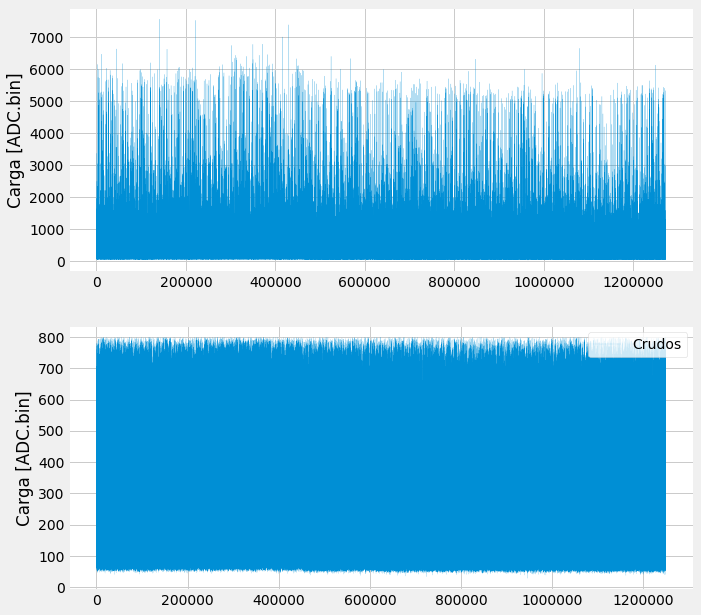

In [ ]:
fig, ax = plt.subplots(2, figsize=(10,10))
# pintar el histograma de carga
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
ax[0].plot(range(len(carga)),carga, lw=0.15, label="Crudos")
ax[0].set_ylabel("Carga [ADC.bin]")
ax[0].set_xlabel("")

# pintar la función de densidad de probabilidad
ax[1].plot(range(len(carga8)),carga8, lw=0.1, label="Crudos")
ax[1].set_ylabel("Carga [ADC.bin]")
ax[1].set_xlabel("")

plt.legend()

plt.show()

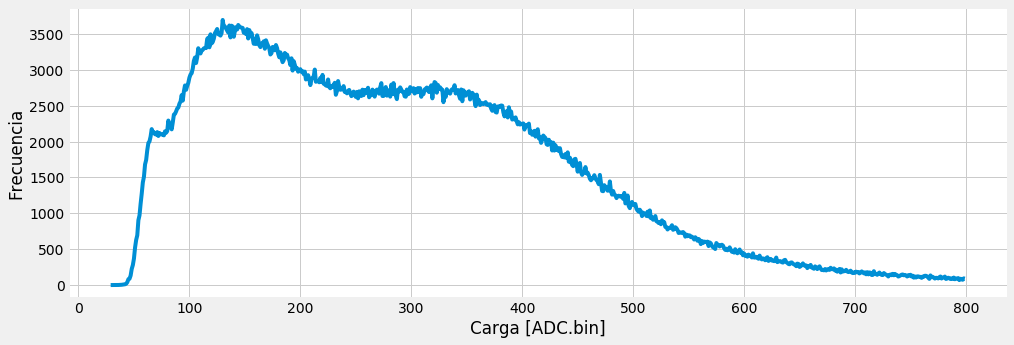

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(hist_sorted[:,0],hist_sorted[:,1], lw=4, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

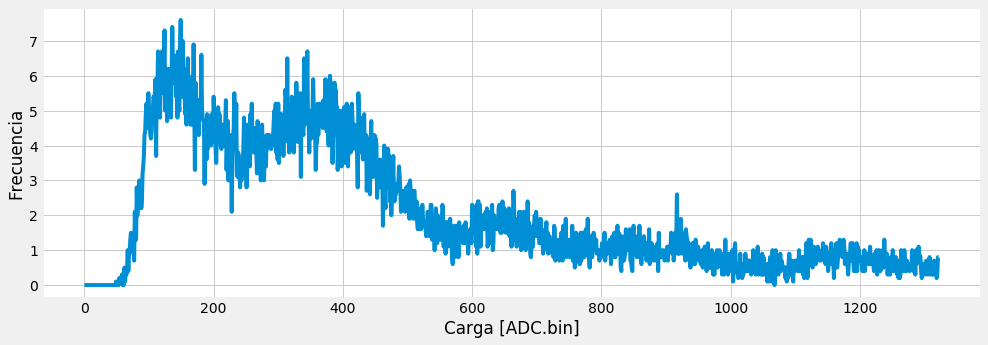

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(hist_mult[:,0],hist_mult[:,1], lw=4, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

In [ ]:
print(hist_sorted.shape, hist_mult.shape, carga.shape, carga8.shape,'diferendia: ',len(carga)-len(carga8))
carga8.sort()
carga8

((765, 2), (1323, 2), (1273125,), (1249257,), 'diferendia: ', 23868)


array([ 29.,  34.,  36., ..., 799., 799., 799.])

In [ ]:
n=[2,5,6,4,2,5,8,9,64,4]
n.sort()
n

[2, 2, 4, 4, 5, 5, 6, 8, 9, 64]

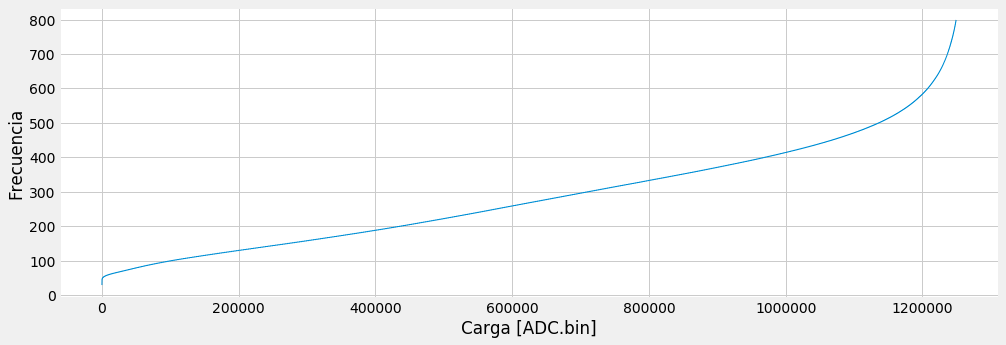

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(len(carga8)),carga8, lw=1, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure

val = filters.threshold_otsu(hist_sorted)
val

1565.7734375

* Parametrizar los datos para ajustarlo a una distribución probabilística.

Según el histograma podemos parametrizar nuestra función de probabilidad como la mezcla de dos distribuciones normales como sigue:
$M = p\phi_{1}+(1-p)\phi_{2}$

donde $p$ indica la proporción de la suma (valores entre 0 y 1), y $\phi_1$ y $\phi_2$ son dos distribuciones normales con parametros $\mu_1, \sigma_1, \mu_2, \sigma_2$. Entonces, nuestros datos de modelarán con estos 4 parametros. 


## Actividades para el objetivo especifico 2: Implementar un clasificador de aprendizaje supervisado que permita separar la componente muonica de la componente EM y multipartícula.


* Definir una función de probabilidad optimizando los valores que ajusten a la curva de la distribución seleccionada.

In [ ]:
hist_mult.shape

(1323, 2)

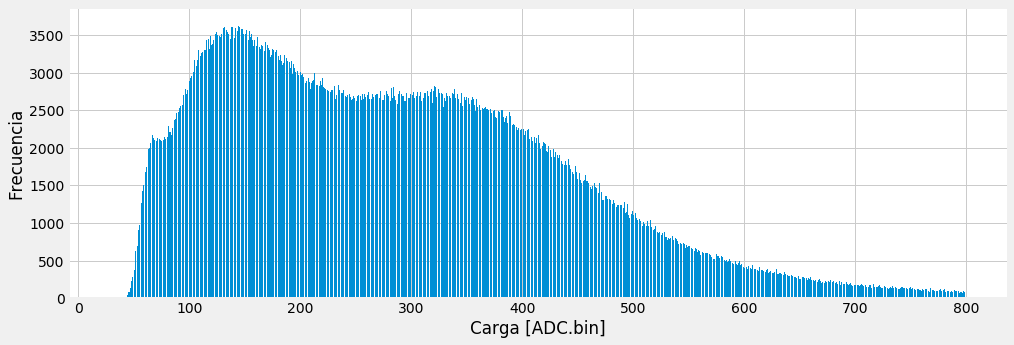

In [ ]:

plt.figure(figsize=(15,5))
plt.hist(carga8, bins=1000)
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

In [ ]:
# Instanciar el modelo
numero_muestras = len(hist_mult1)
# Intentamos ajustar los valores de carga a dos distribuciones normales
GMM = GaussianMixture(n_components=3, 
                      covariance_type='full', 
                      max_iter=1000,
                      n_init=5,
                      weights_init=[.6,.3,.1]) 
# Entrenamiento
GMM.fit(hist_mult1.reshape(-1, 1));
print('Converge:',GMM.converged_) # 
# Parámetros
weights = GMM.weights_
means = GMM.means_ 
covariances = GMM.covariances_

('Converge:', True)


In [ ]:
# Evaluar el modelo GMM
# valores de carga
gmm_x = hist_mult1
# obtener las probabilidades para cada valor de carga
gmm_y = np.exp(GMM.score_samples(gmm_x.reshape(-1,1)))

In [ ]:
gmm_x.shape

(1323,)

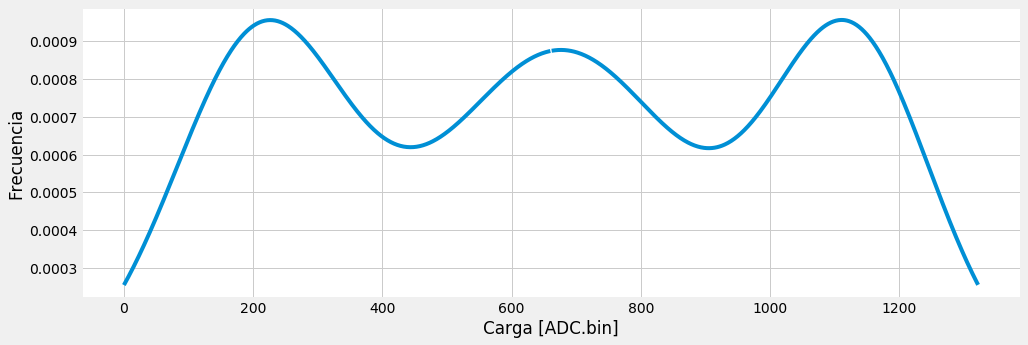

In [ ]:
mpl.rcParams['agg.path.chunksize'] = 1000
plt.figure(figsize=(15,5))
plt.plot(gmm_x,gmm_y, lw=4, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");


In [ ]:
len(ep)+len(muon)+len(multi)

1322

/content/drive/MyDrive/MuTe/ExploracionInicial/img1


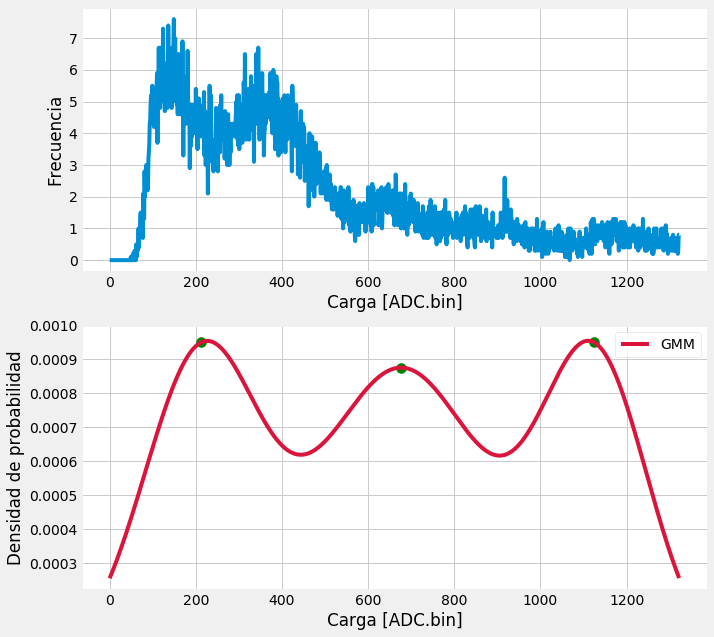

In [ ]:
%cd /content/drive/MyDrive/MuTe/ExploracionInicial/img1
# Pintar los resultados
plt.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(2, figsize=(10,10))
# pintar el histograma de carga
ax[0].plot(hist_mult[:,0],hist_mult[:,1], lw=4, label="Histogram")
ax[0].set_ylabel("Frecuencia")
ax[0].set_xlabel("Carga [ADC.bin]")

# pintar la función de densidad de probabilidad
ax[1].plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")
ax[1].scatter(means, np.exp(GMM.score_samples(means.reshape(-1,1))), color='green', s=100)
ax[1].set_ylabel("Densidad de probabilidad")
ax[1].set_xlabel("Carga [ADC.bin]")

plt.savefig('gmmH.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.legend()

plt.show()

* A partir de los valores ajustados con la funcion de densidad de probabilidad (PDF), analizar independientemente cada componente por medio de la distribucion extraıda del histograma de carga.

In [ ]:
print('Parametros')
print('medias', means)
print('varianzas', covariances)
print('pesos', weights)

Parametros
('medias', array([[169.17759631],
       [384.64857739]]))
('varianzas', array([[[ 4588.72101222]],

       [[16474.59024401]]]))
('pesos', array([0.54232243, 0.45767757]))


In [ ]:
covariances=covariances[np.argsort(means.flatten())]
means      =means      [np.argsort(means.flatten())]

In [ ]:
# Se define una funcióón gaussiana para analizar independientemente cada normal estimada
def gaussian_pdf(x, mu, std, scale=1):
  return scale*np.exp((-(x-mu)**2)/(2*(std**2)))

# Construir las distribuciones
EM_distribucion = gaussian_pdf(x=carga8, mu=means[0], std=np.sqrt(covariances[0]), scale=4200)
Muons_distribucion = gaussian_pdf(x=carga8, mu=means[1], std=np.sqrt(covariances[1]), scale=3000)

In [ ]:
np.squeeze(EM_distribucion)[np.where(carga8 == 169.17759631)], np.squeeze(Muons_distribucion)[np.where(carga8 == 384)]


(array([], dtype=float64),
 array([2999.96170011, 2999.96170011, 2999.96170011, ..., 2999.96170011,
        2999.96170011, 2999.96170011]))

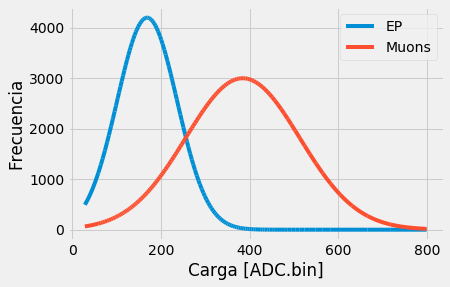

In [ ]:
# Mostrar las dos indendientemente
plt.plot(gmm_x, np.squeeze(EM_distribucion), lw=4, label="EP");
plt.plot(gmm_x, np.squeeze(Muons_distribucion), label="Muons");
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");
plt.legend()
plt.show()

* Evaluando las componentes independientes, se etiqueta cada tupla de datos con
unos y ceros, mounes y EP respectivamente.

In [ ]:
carga8.shape,gmm_x.shape

((1249257,), (1249257,))

In [ ]:
for x in range(len(carga8)):
  if np.squeeze(EM_distribucion)[x] <  np.squeeze(Muons_distribucion)[x]:
    break
np.squeeze(EM_distribucion)[[x-1,x]], np.squeeze(Muons_distribucion)[[x-1,x]], carga8[x]

(array([1847.26952541, 1812.44873863]),
 array([1815.40714781, 1829.58346417]),
 257.0)

In [ ]:
# se etiqueta cada valor de carga con unos y ceros dependiendo del valor de probabilidad de cada pdf
# 1 para muones - 0 para EM
etiquetas = np.array(EM_distribucion < Muons_distribucion, dtype=int)

In [ ]:
print('Numero de elemento por etiqueta')
np.unique(etiquetas, return_counts=True)

Numero de elemento por etiqueta


(array([0, 1]), array([593981, 655276]))

* Para el entrenamiento de los datos con el modelo a emplear, se usan caracteristicas y etiquetas, de tal manera que se pueda evaluar el comportamiento del clasificador
a usar

Para la clasificacion supervisada se va a utilizar un clasificador gausiano y para poder evaluar el modelo se dividira los datos en train y test de manera aleatoria usando train_test_split con un porcentaje fijo. Otros esquemas de evaluacion pueden aplicarse como validacion cruzada y train test split estratificado. [métodos](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [ ]:
# dividir los datos en train (70%) y test (30%) seleccionados de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(gmm_x, np.squeeze(etiquetas), test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# crear el modelo
clfG = GaussianNB()
# entrenar el modelo en los datos de entrenamiento
clfG.fit(X_train.reshape(-1, 1), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# evaluar el modelo en train y test
print('Accuracy promedio en train:')
clfG.score(X_train.reshape(-1, 1), y_train)

Accuracy promedio en train:


0.9936064788291086

In [ ]:
print('Accuracy promedio en test:')
clfG.score(X_test.reshape(-1, 1), y_test)

Accuracy promedio en test:


0.9934441189183997

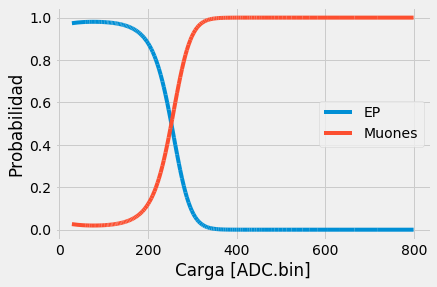

In [ ]:
plt.plot(gmm_x, clfG.predict_proba(gmm_x.reshape(-1, 1))[:,0], label='EP')
plt.plot(gmm_x, clfG.predict_proba(gmm_x.reshape(-1, 1))[:,1], label='Muones')
plt.ylabel("Probabilidad");
plt.xlabel("Carga [ADC.bin]");
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# crear el modelo
clfRF = RandomForestClassifier()
clfRF.fit(X_train.reshape(-1, 1), y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# evaluar el modelo en train y test
print('Accuracy promedio en train:')
clfRF.score(X_train.reshape(-1, 1), y_train)

Accuracy promedio en train:


1.0

In [ ]:
print('Accuracy promedio en test:')
clfRF.score(X_test.reshape(-1, 1), y_test)

Accuracy promedio en test:


1.0

In [ ]:
from sklearn import svm
# crear el modelo
clfSV = svm.SVC()
clfSV.fit(X_train.reshape(-1, 1), y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
# evaluar el modelo en train y test
print('Accuracy promedio en train:')
clfSV.score(X_train.reshape(-1, 1), y_train)

Accuracy promedio en train:


1.0

In [ ]:
print('Accuracy promedio en test:')
clfSV.score(X_test.reshape(-1, 1), y_test)

Accuracy promedio en test:


0.8779956427015251

In [ ]:
clfSV.predict(gmm_x.reshape(-1, 1))

array([0, 0, 0, ..., 0, 0, 0])

Notas: Los datos pueden ser separados usado otros metodos como [otsu](http://www.idlcoyote.com/code_tips/otsu_threshold.php). Una camino mas formal para encontrar el punto de corte se puede consultar aqui [Finite mixture models](http://marcchoisy.free.fr/fmm/index.html) es el mismo sentido que manejamos para estimar los parametros pero la diferencia recae en que no se hace analisis independiente para encontrar el punto de corte entre las dos distribuciones. Además, con respecto a los metodos de clasificacion, se pueden usar varios pero todos tendria mas o menos el mismo redimiento ya que los datos no son complejos de separar.